# Inspect Pascal VOC (2007&2012) Detection torchvision Dataset

In [1]:
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data.dataloader as dataloader
import torchvision
from torchvision import transforms
from torchvision.transforms import v2
from torchvision.utils import draw_bounding_boxes
from torch.utils.data import ConcatDataset
from torchvision import tv_tensors
from torchvision.datasets import wrap_dataset_for_transforms_v2
from torchvision.tv_tensors._dataset_wrapper import VOC_DETECTION_CATEGORIES, VOC_DETECTION_CATEGORY_TO_IDX
from torchvision.ops import box_convert
from torchvision import tv_tensors
# palette is a list of color tuples, which is used for visualization.
palette =  [(106, 0, 228), (119, 11, 32), (165, 42, 42), (0, 0, 192),
            (197, 226, 255), (0, 60, 100), (0, 0, 142), (255, 77, 255),
            (153, 69, 1), (120, 166, 157), (0, 182, 199),
            (0, 226, 252), (182, 182, 255), (0, 0, 230), (220, 20, 60),
            (163, 255, 0), (0, 82, 0), (3, 95, 161), (0, 80, 100),
            (183, 130, 88)]

## Check sample data

In [4]:
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2007_val = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='val', download=False,
                                                     transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2007_trainval = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='trainval', download=False,
                                                     transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2007_test = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='test', download=False,
                                                      transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2012_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2012', image_set='train', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2012_val = torchvision.datasets.VOCDetection(root='../data/voc', year='2012', image_set='val', download=False,
                                                     transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2012_trainval = torchvision.datasets.VOCDetection(root='../data/voc', year='2012', image_set='trainval', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))

Len of dataset_2007_train: 2501
Len of dataset_2007_val: 2510
Len of dataset_2007_trainval: 5011
Len of dataset_2007_test: 4952
Len of dataset_2012_train: 5717
Len of dataset_2012_val: 5823
Len of dataset_2012_trainval: 11540
Sample:
Image: Image([[[ 59,  17,   0,  ..., 208, 218, 182],
        [ 84,  16,   1,  ..., 255, 253, 231],
        [113,  16,   0,  ..., 233, 229, 223],
        ...,
        [ 90, 106, 136,  ..., 199, 199, 202],
        [113, 120, 134,  ..., 196, 195, 198],
        [114, 123, 112,  ..., 199, 201, 203]],

       [[112,  57,   6,  ..., 197, 206, 173],
        [132,  53,  13,  ..., 246, 243, 223],
        [154,  48,   6,  ..., 220, 220, 216],
        ...,
        [ 76,  90, 117,  ..., 179, 182, 185],
        [ 99, 104, 115,  ..., 176, 178, 183],
        [100, 107,  93,  ..., 182, 184, 188]],

       [[252, 179,  95,  ..., 179, 190, 156],
        [255, 168,  97,  ..., 232, 231, 210],
        [255, 151,  82,  ..., 214, 215, 210],
        ...,
        [ 63,  77, 103,  .

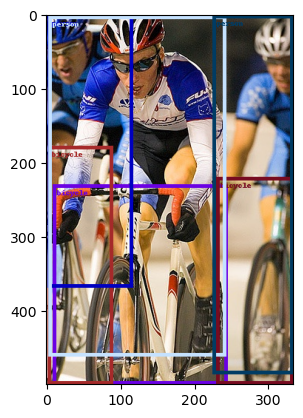

In [5]:
print(f"Len of dataset_2007_train: {len(dataset_2007_train)}")
print(f"Len of dataset_2007_val: {len(dataset_2007_val)}")
print(f"Len of dataset_2007_trainval: {len(dataset_2007_trainval)}")
print(f"Len of dataset_2007_test: {len(dataset_2007_test)}")
print(f"Len of dataset_2012_train: {len(dataset_2012_train)}")
print(f"Len of dataset_2012_val: {len(dataset_2012_val)}")
print(f"Len of dataset_2012_trainval: {len(dataset_2012_trainval)}")

print("Sample:")
x, y = dataset_2007_train[2]
print(f"Image: {x} ({type(x)=}), hw={x.shape}")  # Before transforms, it's a PIL Image with non-fixed size
print(f"Label: {y} ({type(y)=})")
print(f"Bounding boxes:")
boxes = []
labels = []
for box in y['annotation']['object']:
    boxes.append([int(box['bndbox']['xmin']), int(box['bndbox']['ymin']), int(box['bndbox']['xmax']), int(box['bndbox']['ymax'])])
    labels.append(box['name'])
    print(f"  {box['name']}: {box['bndbox']}")
img = draw_bounding_boxes(x, boxes=torch.tensor(boxes), labels=labels, colors=[palette[i%len(palette)] for i in range(len(boxes))], width=5)
plt.imshow(img.permute(1, 2, 0))

In [6]:
dataset_train = ConcatDataset([dataset_2007_train, dataset_2012_train, dataset_2007_val, dataset_2012_val])
dataset_test = dataset_2007_test

print(f"Len of dataset_train: {len(dataset_train)}")
print(f"Len of dataset_test: {len(dataset_test)}")

Len of dataset_train: 16551
Len of dataset_test: 4952


## Test transform & target_transform

In [7]:
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]),
                                                       target_transform=lambda y: [[box['name'], torch.tensor([int(box['bndbox']['xmin']),
                                                                                                               int(box['bndbox']['ymin']),
                                                                                                               int(box['bndbox']['xmax']),
                                                                                                               int(box['bndbox']['ymax'])])]
                                                                                   for box in y['annotation']['object']])
x, y = dataset_2007_train[2]
print(f"Image: {x} ({type(x)=}), hw={x.shape}")
print(f"Label: {y} ({type(y)=})")

Image: Image([[[ 59,  17,   0,  ..., 208, 218, 182],
        [ 84,  16,   1,  ..., 255, 253, 231],
        [113,  16,   0,  ..., 233, 229, 223],
        ...,
        [ 90, 106, 136,  ..., 199, 199, 202],
        [113, 120, 134,  ..., 196, 195, 198],
        [114, 123, 112,  ..., 199, 201, 203]],

       [[112,  57,   6,  ..., 197, 206, 173],
        [132,  53,  13,  ..., 246, 243, 223],
        [154,  48,   6,  ..., 220, 220, 216],
        ...,
        [ 76,  90, 117,  ..., 179, 182, 185],
        [ 99, 104, 115,  ..., 176, 178, 183],
        [100, 107,  93,  ..., 182, 184, 188]],

       [[252, 179,  95,  ..., 179, 190, 156],
        [255, 168,  97,  ..., 232, 231, 210],
        [255, 151,  82,  ..., 214, 215, 210],
        ...,
        [ 63,  77, 103,  ..., 152, 154, 157],
        [ 88,  91, 101,  ..., 149, 148, 152],
        [ 89,  94,  79,  ..., 154, 154, 157]]], dtype=torch.uint8, ) (type(x)=<class 'torchvision.tv_tensors._image.Image'>), hw=torch.Size([3, 500, 334])
Label: [['bic

## Wrap by v2

In [8]:
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False)
print("Without v2 wrap:")
x, y = dataset_2007_train[2]
print(x, y)
print(y.keys())

dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train)
print("\nWith v2 wrap & target_keys=None:")
x, y = dataset_2007_train_v2[2]
print(x, y)
print(y.keys())
print(f"labels2categories: {[VOC_DETECTION_CATEGORIES[idx] for idx in y['labels']]}")

dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys='all')
print("\nWith v2 wrap & target_keys='all':")
x, y = dataset_2007_train_v2[2]
print(x, y)
print(y.keys())

Without v2 wrap:
<PIL.Image.Image image mode=RGB size=334x500 at 0x7AE40B600700> {'annotation': {'folder': 'VOC2007', 'filename': '000023.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '220208496'}, 'owner': {'flickrid': 'thevelodrome.com', 'name': '?'}, 'size': {'width': '334', 'height': '500', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'bicycle', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '9', 'ymin': '230', 'xmax': '245', 'ymax': '500'}}, {'name': 'bicycle', 'pose': 'Frontal', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '230', 'ymin': '220', 'xmax': '334', 'ymax': '500'}}, {'name': 'bicycle', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '1', 'bndbox': {'xmin': '2', 'ymin': '178', 'xmax': '90', 'ymax': '500'}}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '2', 'ymin': '1', 'xmax': '117', 'ymax': '369'

## All together

x=Image([[[0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        ...,
        [0.8784, 0.4196, 0.3529,  ..., 0.4824, 0.4824, 0.4824],
        [0.6941, 0.3059, 0.3647,  ..., 0.4824, 0.4824, 0.4824],
        [0.4863, 0.2784, 0.4275,  ..., 0.4824, 0.4824, 0.4824]],

       [[0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        ...,
        [0.8235, 0.3843, 0.3294,  ..., 0.4588, 0.4588, 0.4588],
        [0.6392, 0.2824, 0.3529,  ..., 0.4588, 0.4588, 0.4588],
        [0.4471, 0.2667, 0.4196,  ..., 0.4588, 0.4588, 0.4588]],

       [[0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
        [0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
        [0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
        

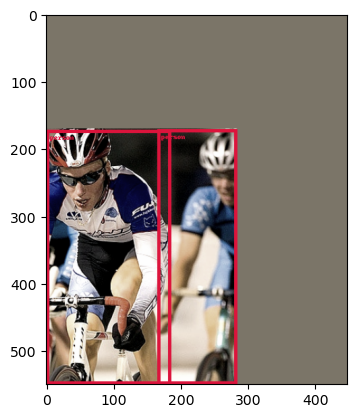

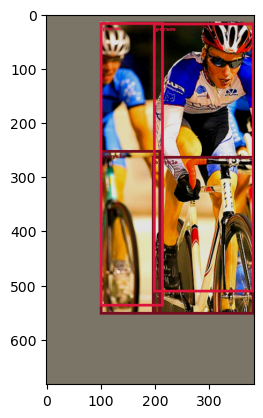

In [9]:
brightness = 0.4
contrast = 0.4
saturation = 0.7
hue = 0.015
flip_p = 0.5

transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
        v2.RandomZoomOut(fill={tv_tensors.Image: (123.0, 117.0, 104.0), "others": 0}),
        v2.RandomIoUCrop(),
        v2.RandomHorizontalFlip(p=flip_p),
        v2.RandomShortestSize(min_size=(320, 352, 384, 416, 448, 480, 512, 544, 576, 608), antialias=True),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
    ]
)
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y = dataset_2007_train_v2[2]
print(f"{x=}\n{y=}")
labels = [VOC_DETECTION_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True), labels=labels, boxes=y['boxes'], colors=[palette[idx-1] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

x, y = dataset_2007_train_v2[2]
labels = [VOC_DETECTION_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True), labels=labels, boxes=y['boxes'], colors=[palette[idx-1] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

## Add custom image transform

x.shape=torch.Size([3, 608, 608])
y={'boxes': BoundingBoxes([[ 22, 290, 415, 608],
               [389, 271, 510, 608],
               [ 22, 207, 156, 608],
               [ 21,   0, 202, 528],
               [ 21,   0, 412, 608],
               [381,   0, 510, 608]], format=BoundingBoxFormat.XYXY, canvas_size=(608, 608)), 'labels': tensor([ 2,  2,  2, 15, 15, 15])}


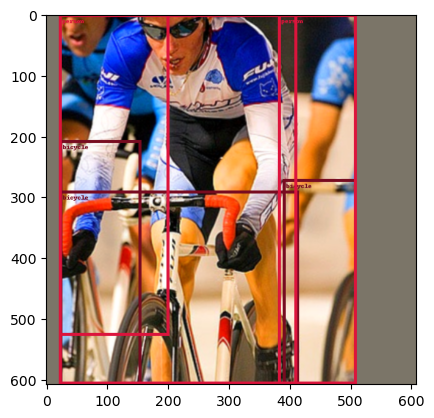

tensor([123, 117, 104], dtype=torch.uint8)


In [2]:
multiscale_min_sizes = (320, 352, 384, 416, 448, 480, 512, 544, 576, 608)

perspective = 0.015
crop_scale = 0.8
ratio_min = 0.5
ratio_max = 2.0
degrees = 0.5  # unit: deg
translate = 0.1
scale = 0.25
shear = 0.5  # unit: deg
brightness = 0.4
contrast = 0.4
saturation = 0.7
hue = 0.015
flip_p = 0.5
letterbox = True
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)

fill = {tv_tensors.Image: (123.0, 117.0, 104.0), "others": 0}

from typing import Any, Callable, cast, Dict, List, Literal, Optional, Sequence, Tuple, Type, Union
from torchvision.transforms.v2 import functional as F, InterpolationMode
from torchvision.transforms.v2.functional._utils import _FillType
from torch.utils._pytree import tree_flatten, tree_unflatten
class Resize(v2.Resize):
    def __init__(
            self,
            letterbox: bool,
            fill:  Union[_FillType, Dict[Union[Type, str], _FillType]] = 0,
            **kwargs,  # params for v2.Resize
        ) -> None:
        super().__init__(**kwargs)
        self.size = self.size + self.size if len(self.size) == 1 else self.size
        self.letterbox = letterbox
        self.fill = fill
        self._fill = v2._utils._setup_fill_arg(fill)
        self.padding_mode = 'constant'  # only support constant padding mode for bounding boxes

    def _get_params(self, flat_inputs: List[Any]) -> Dict[str, Any]:
        orig_h, orig_w = v2._utils.query_size(flat_inputs)
        new_h, new_w = self.size
        if not self.letterbox:
            return dict(size=(new_h, new_w))
        else:  # do letterbox
            r_h, r_w = new_h / orig_h, new_w / orig_w
            r = min(r_h, r_w)
            new_unpad_h, new_unpad_w = round(orig_h * r), round(orig_w * r)
            pad_left = pad_right = pad_top = pad_bottom = 0
            if r_w < r_h:
                diff = new_h - new_unpad_h
                pad_top += (diff // 2)
                pad_bottom += (diff - pad_top)
            else:  # r_h <= r_w:
                diff = new_w - new_unpad_w
                pad_left += (diff // 2)
                pad_right += (diff - pad_left)
            padding = [pad_left, pad_top, pad_right, pad_bottom]
            return dict(size=(new_unpad_h, new_unpad_w), padding=padding)

    def _transform(self, inpt: Any, params: Dict[str, Any]) -> Any:
        inpt = self._call_kernel(F.resize, inpt, size=params['size'],
                                 interpolation=self.interpolation, antialias=self.antialias)
        if self.letterbox:
            fill = v2._utils._get_fill(self._fill, type(inpt))
            inpt = self._call_kernel(F.pad, inpt, padding=params["padding"], fill=fill, padding_mode=self.padding_mode)
        return inpt

transforms = v2.Compose(  # TODO: random ratio & black edge when bilinear interpolation after filled padding
    [
        v2.ToImage(),
        v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
        v2.RandomIoUCrop(min_scale=crop_scale, max_scale=1.0, min_aspect_ratio=ratio_min, max_aspect_ratio=ratio_max),
        Resize(size=multiscale_min_sizes[-1], letterbox=letterbox, fill=fill, antialias=True),
        v2.RandomPerspective(distortion_scale=perspective, fill=fill),
        v2.RandomAffine(degrees=degrees, translate=(translate, translate), scale=(1 - scale, 1 + scale),
                        shear=(-shear, shear, -shear, shear), fill=fill, interpolation=InterpolationMode.BILINEAR),
        v2.RandomHorizontalFlip(p=flip_p),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ]
)
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y = dataset_2007_train_v2[2]
print(f"{x.shape=}\n{y=}")
labels = [VOC_DETECTION_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True), labels=labels, boxes=y['boxes'], colors=[palette[idx-1] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()
print(img[:, 0, 0])

## Add custom target transform

x.shape=torch.Size([3, 608, 608])
y.shape=torch.Size([19, 19, 5, 6])
y={'boxes': tensor([[ 25., 272., 335., 437.],
        [  0., 145., 421., 576.]]), 'labels': tensor([7, 8])}
y_supp={'boxes': tensor([[ 25, 272, 335, 437],
        [  0, 145, 421, 576]]), 'labels': tensor([7, 8])}


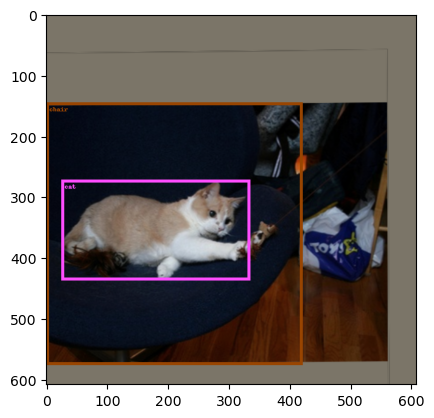

x.shape=torch.Size([3, 608, 608])
y.shape=torch.Size([19, 19, 5, 6])
y={'boxes': tensor([[163., 224., 392., 346.],
        [100., 168., 489., 471.]]), 'labels': tensor([7, 8])}
y_supp={'boxes': tensor([[163, 224, 392, 346],
        [100, 168, 489, 471]]), 'labels': tensor([7, 8])}


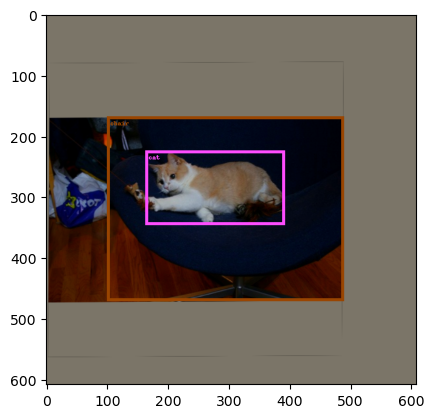

In [9]:
n_box_per_cell = 5
min_wh = 1e-3  # normalized by the grid cell width,height

class Voc2Yolov2(nn.Module):
    """
    x (Tensor): size(3, img_h, img_w), RGB, 0~255
    y_yolov2 (Tensor): size(n_grid_h, n_grid_w, n_box_per_cell, 6)
        targets[j, k, l, 0:4] is is the box coordinates for the l-th box in the j,k-th grid cell, 0.0~1.0
            targets[j, k, l, 0:2] is the cx,cy relative to top-left corner of the j,k-th grid cell
                               and normalized by the grid cell width,height,
                               i.e., ground truth of sigmoid(t_x), sigmoid(t_y) in the paper
            targets[j, k, l, 2:4] is the w,h normalized by the grid cell width,height,
                               i.e., ground truth of p_w * exp(t_w), p_h * exp(t_h) in the paper
        targets[j, k, l, 4] is the is_obj for the l-th box in the j,k-th grid cell, 1.0 if there is an object, 0.0 otherwise
        targets[j, k, l, 5] is the class index for the l-th box in the j,k-th grid cell, 0.0~float(n_class-1)
    y_voc['boxes'] (tv_tensors.BoundingBoxes): size(n_box=, 4), format='XYXY'
        y_voc['boxes'] is not normalized
    """
    # The first three functions are for cumcount
    # Ref: https://stackoverflow.com/questions/40602269/how-to-use-numpy-to-get-the-cumulative-count-by-unique-values-in-linear-time
    def _dfill(self, a):
        n = a.size
        b = np.concatenate([[0], np.where(a[:-1] != a[1:])[0] + 1, [n]])
        return np.arange(n)[b[:-1]].repeat(np.diff(b))

    def _argunsort(self, s):
        n = s.size
        u = np.empty(n, dtype=np.int64)
        u[s] = np.arange(n)
        return u

    def _cumcount(self, a):
        n = a.size
        s = a.argsort(kind='mergesort')
        i = self._argunsort(s)
        b = a[s]
        return (np.arange(n) - self._dfill(b))[i]

    def forward(self, x, y_voc):
        img_h, img_w = x.shape[-2:]
        n_grid_h, n_grid_w = img_h * 13 // 416, img_w * 13 // 416
        boxes_yolov2 = y_voc['boxes'].clone()
        # Transform the bounding boxes from xyxy to cxcywh, boxes_yolov2.dtype is int64
        boxes_yolov2 = box_convert(boxes_yolov2, in_fmt='xyxy', out_fmt='cxcywh')
        # Normalized the bounding boxes by the image width,height, boxes_yolov2.dtype become float32
        boxes_yolov2[:, [0, 2]] /= img_w
        boxes_yolov2[:, [1, 3]] /= img_h
        # Normalized the bounding boxes by the grid cell width,height
        boxes_yolov2[:, [0, 2]] *= n_grid_w
        boxes_yolov2[:, [1, 3]] *= n_grid_h
        # Remove the bounding boxes with width or height less than min_wh to avoid numerical instability of log(0)
        keep = (boxes_yolov2[:, 2] > min_wh) & (boxes_yolov2[:, 3] > min_wh)
        boxes_yolov2 = boxes_yolov2[keep]
        y_voc['boxes'] = y_voc['boxes'][keep]
        y_voc['labels'] = y_voc['labels'][keep]
        # Randomly shuffle the bounding boxes and labels, since only n_box_per_cell object can be assigned to a grid cell
        idx = torch.randperm(len(boxes_yolov2))
        y_voc['boxes'] = y_voc['boxes'][idx]
        boxes_yolov2 = boxes_yolov2[idx]
        y_voc['labels'] = y_voc['labels'][idx] - 1  # remove background class
        y_yolov2 = torch.zeros((n_grid_h, n_grid_w, n_box_per_cell, 6), dtype=torch.float32)
        if boxes_yolov2.numel() > 0:
            cx_yolov2, cy_yolov2, w_yolov2, h_yolov2 = torch.unbind(boxes_yolov2, dim=1)
            grid_x = torch.clamp_max(torch.floor(cx_yolov2), (n_grid_w - 1)).to(torch.int64)
            grid_y = torch.clamp_max(torch.floor(cy_yolov2), (n_grid_h - 1)).to(torch.int64)
            _, obj_grid_idx = torch.unique(torch.stack((grid_x, grid_y)), return_inverse=True, dim=1)
            grid_idx_box = self._cumcount(obj_grid_idx.numpy())
            grid_idx_box = np.minimum(grid_idx_box, (n_box_per_cell - 1))
            y_yolov2[grid_y, grid_x, grid_idx_box, 4] = 1.0  # set the is_obj to 1.0
            y_yolov2[grid_y, grid_x, grid_idx_box, 5] = y_voc['labels'].to(torch.float32)  # set the class index to label
            # Set the box coordinates, all normalized by the grid size
            y_yolov2[grid_y, grid_x, grid_idx_box, 0] = cx_yolov2 - grid_x
            y_yolov2[grid_y, grid_x, grid_idx_box, 1] = cy_yolov2 - grid_y
            y_yolov2[grid_y, grid_x, grid_idx_box, 2] = w_yolov2
            y_yolov2[grid_y, grid_x, grid_idx_box, 3] = h_yolov2
        return x, y_yolov2, y_voc

    def inv_targets_transform(self, x, y_yolov2):
        img_h, img_w = x.shape[-2:]
        n_grid_h, n_grid_w = y_yolov2.shape[:2]
        assert n_grid_h * 32 == img_h and n_grid_w * 32 == img_w, "x & y size mismatch! might not be transformed together."  # for dubug
        y_voc = {}
        y_voc['boxes'] = torch.zeros((0, 4), dtype=torch.float32)
        y_voc['labels'] = torch.zeros((0,), dtype=torch.int64)
        for grid_y in range(n_grid_h):
            for grid_x in range(n_grid_w):
                for idx_box in range(n_box_per_cell):
                    if y_yolov2[grid_y, grid_x, idx_box, 4] > 0.0:
                        box = torch.zeros((4,), dtype=torch.float32)
                        box[0] = y_yolov2[grid_y, grid_x, idx_box, 0] + grid_x
                        box[1] = y_yolov2[grid_y, grid_x, idx_box, 1] + grid_y
                        box[2] = y_yolov2[grid_y, grid_x, idx_box, 2]
                        box[3] = y_yolov2[grid_y, grid_x, idx_box, 3]
                        y_voc['boxes'] = torch.cat((y_voc['boxes'], box.unsqueeze(0)), dim=0)
                        label = (y_yolov2[grid_y, grid_x, idx_box, 5]).to(torch.int64).unsqueeze(0)
                        y_voc['labels'] = torch.cat((y_voc['labels'], label), dim=0)
        y_voc['boxes'][:, [0, 2]] /= n_grid_w
        y_voc['boxes'][:, [1, 3]] /= n_grid_h
        y_voc['boxes'][:, [0, 2]] *= img_w
        y_voc['boxes'][:, [1, 3]] *= img_h
        y_voc['boxes'] = box_convert(y_voc['boxes'], in_fmt='cxcywh', out_fmt='xyxy')
        return y_voc

transforms = v2.Compose([
    v2.ToImage(),
    v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
    v2.RandomIoUCrop(min_scale=crop_scale, max_scale=1.0, min_aspect_ratio=ratio_min, max_aspect_ratio=ratio_max),
    Resize(size=multiscale_min_sizes[-1], letterbox=letterbox, fill=fill, antialias=True),
    v2.RandomPerspective(distortion_scale=perspective, fill=fill),
    v2.RandomAffine(degrees=degrees, translate=(translate, translate), scale=(1 - scale, 1 + scale),
                    shear=(-shear, shear, -shear, shear), fill=fill, interpolation=InterpolationMode.BILINEAR),
    v2.RandomHorizontalFlip(p=flip_p),
    v2.SanitizeBoundingBoxes(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=imgs_mean, std=imgs_std),
    Voc2Yolov2(),
])

dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y, y_supp = dataset_2007_train_v2[10]
print(f"{x.shape=}\n{y.shape=}")
y = Voc2Yolov2().inv_targets_transform(x, y)
print(f"{y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

x, y, y_supp = dataset_2007_train_v2[10]
print(f"{x.shape=}\n{y.shape=}")
y = Voc2Yolov2().inv_targets_transform(x, y)
print(f"{y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

## Dataloader

torch.Size([3, 608, 608])
torch.Size([3, 608, 608])
torch.Size([3, 608, 608])
X.shape=torch.Size([4, 3, 480, 480])
Y.shape=torch.Size([4, 15, 15, 5, 6])
Y_SUPP=[{'boxes': tensor([[385, 175, 476, 288],
        [230, 147, 333, 272],
        [236, 179, 382, 277],
        [381, 144, 476, 273]]), 'labels': tensor([13, 14, 13, 14])}, {'boxes': tensor([[  0, 200, 176, 368],
        [191, 229, 365, 405]]), 'labels': tensor([17,  8])}, {'boxes': tensor([[  0,  83, 449, 400]]), 'labels': tensor([9])}, {'boxes': tensor([[174, 157, 400, 413]]), 'labels': tensor([11])}]
y=tensor([[[[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]

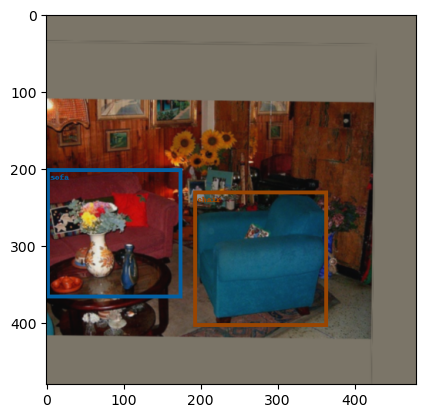

In [10]:
dataset_2007_train = torchvision.datasets.VOCDetection(
    root='../data/voc', year='2007', image_set='train', download=False,
    transforms=v2.Compose([
        v2.ToImage(),
        v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
        v2.RandomIoUCrop(min_scale=crop_scale, max_scale=1.0, min_aspect_ratio=ratio_min, max_aspect_ratio=ratio_max),
        Resize(size=multiscale_min_sizes[-1], letterbox=letterbox, fill=fill, antialias=True),
        v2.RandomPerspective(distortion_scale=perspective, fill=fill),
        v2.RandomAffine(degrees=degrees, translate=(translate, translate), scale=(1 - scale, 1 + scale),
                        shear=(-shear, shear, -shear, shear), fill=fill, interpolation=InterpolationMode.BILINEAR),
        v2.RandomHorizontalFlip(p=flip_p),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
        #Voc2Yolov2(),  # leave it after batched_multi_scale_transform
    ])
)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])
print(dataset_2007_train_v2[10][0].shape)
print(dataset_2007_train_v2[11][0].shape)
print(dataset_2007_train_v2[12][0].shape)

batched_multi_scale_transform = v2.RandomShortestSize(min_size=multiscale_min_sizes, antialias=True)
voc2yolov2_transform = Voc2Yolov2()  # placed after all transforms to make sure labels have been transformed along with images

def collate_fn_train(batch):
    xs, ys, y_supps = [], [], []
    for x, y_supp in batch:
        xs.append(x)
        y_supps.append(y_supp)
    xs, y_supps = batched_multi_scale_transform(xs, y_supps)
    for idx_img, (x, y_supp) in enumerate(zip(xs, y_supps)):
        x, y, y_supp = voc2yolov2_transform(x, y_supp)
        xs[idx_img] = x
        ys.append(y)
        y_supps[idx_img] = y_supp
    xs = torch.stack(xs)
    ys = torch.stack(ys)
    return xs, ys, y_supps
dataloader_2007_train = dataloader.DataLoader(dataset_2007_train_v2, batch_size=4, shuffle=True, num_workers=0,
                                              collate_fn=collate_fn_train)
X, Y, Y_SUPP = next(iter(dataloader_2007_train))
print(f"{X.shape=}\n{Y.shape=}")
correct_n_grid_h = X.shape[-2] * 13 // 416
correct_n_grid_w = X.shape[-1] * 13 // 416
assert Y.shape[-4:-2] == (correct_n_grid_h, correct_n_grid_w), "x & y size mismatch! might not be transformed together."
print(f"{Y_SUPP=}")

x, y, y_supp = X[1], Y[1], Y_SUPP[1]
print(f"{y=}")
print(f"{y_supp=}")
y = voc2yolov2_transform.inv_targets_transform(x, y)
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

In [14]:
%%timeit
X, Y, Y_SUPP = next(iter(dataloader_2007_train))

116 ms ± 8.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## ConcatDataset + wrap_dataset_for_transforms_v2

X.shape=torch.Size([4, 3, 416, 416])
Y.shape=torch.Size([4, 13, 13, 5, 6])
Y_SUPP=[{'boxes': tensor([[154, 237, 168, 258],
        [ 33, 221,  59, 268],
        [253, 165, 296, 247]]), 'labels': tensor([3, 3, 3])}, {'boxes': tensor([[ 62, 220, 267, 355]]), 'labels': tensor([6])}, {'boxes': tensor([[327, 143, 416, 261],
        [155, 184, 226, 250],
        [ 94, 173, 150, 237]]), 'labels': tensor([14, 14, 14])}, {'boxes': tensor([[  6, 115, 404, 311]]), 'labels': tensor([5])}]
x.shape=torch.Size([3, 416, 416])
y.shape=torch.Size([13, 13, 5, 6])
y={'boxes': tensor([[253.0000, 165.0000, 296.0000, 247.0000],
        [ 33.0000, 221.0000,  59.0000, 268.0000],
        [154.0000, 237.0000, 168.0000, 258.0000]]), 'labels': tensor([3, 3, 3])}
y_supp={'boxes': tensor([[154, 237, 168, 258],
        [ 33, 221,  59, 268],
        [253, 165, 296, 247]]), 'labels': tensor([3, 3, 3])}


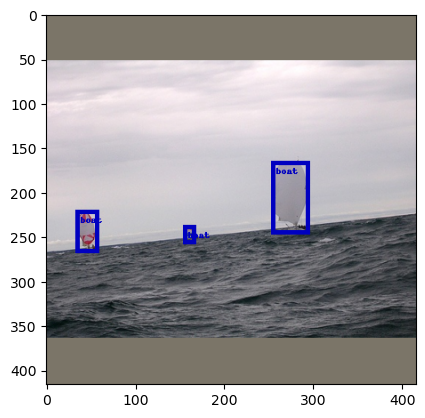

In [21]:
img_h = 416
img_w = 416

transforms_val = v2.Compose([v2.ToImage(),
                             Resize(size=(img_h, img_w), letterbox=letterbox, fill=fill, antialias=True),
                             v2.SanitizeBoundingBoxes(),
                             v2.ToDtype(torch.float32, scale=True),
                             v2.Normalize(mean=imgs_mean, std=imgs_std)])
def collate_fn_val(batch):
    xs, ys, y_supps = [], [], []
    for x, y_supp in batch:
        xs.append(x)
        y_supps.append(y_supp)
    for idx_img, (x, y_supp) in enumerate(zip(xs, y_supps)):
        x, y, y_supp = voc2yolov2_transform(x, y_supp)
        xs[idx_img] = x
        ys.append(y)
        y_supps[idx_img] = y_supp
    xs = torch.stack(xs)
    ys = torch.stack(ys)
    return xs, ys, y_supps
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms_val)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])
dataset_2007_val = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='val', download=False,
                                                     transforms=transforms_val)
dataset_2007_val_v2 = wrap_dataset_for_transforms_v2(dataset_2007_val, target_keys=['boxes', 'labels'])
dataset_2007_trainval_cat = ConcatDataset([dataset_2007_train_v2, dataset_2007_val_v2])
datasetloader_2007_trainval_cat = dataloader.DataLoader(dataset_2007_trainval_cat, batch_size=4, shuffle=True, num_workers=0,
                                                        collate_fn=collate_fn_val)
X, Y, Y_SUPP = next(iter(datasetloader_2007_trainval_cat))
print(f"{X.shape=}\n{Y.shape=}")
print(f"{Y_SUPP=}")

x, y, y_supp = X[0], Y[0], Y_SUPP[0]
print(f"{x.shape=}\n{y.shape=}")
y = Voc2Yolov2().inv_targets_transform(x, y)
print(f"{y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

## Inspect transforms

### Dummy train transforms

x.shape=torch.Size([3, 608, 608])
y.shape=torch.Size([19, 19, 5, 6])
y={'boxes': tensor([[  1.0000, 102.0000, 449.0000, 502.0000],
        [120.0000, 223.0000, 379.0000, 360.0000]]), 'labels': tensor([8, 7])}
y_supp={'boxes': tensor([[  1, 102, 449, 502],
        [120, 223, 379, 360]]), 'labels': tensor([8, 7])}


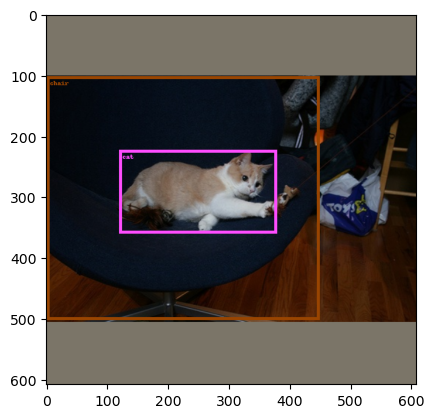

In [22]:
multiscale_min_sizes = (320, 352, 384, 416, 448, 480, 512, 544, 576, 608)

perspective = 0.0
crop_scale = 1.0
ratio_min = 1.0
ratio_max = 1.0
degrees = 0.0  # unit: deg
translate = 0.0
scale = 0.0
shear = 0.0  # unit: deg
brightness = 0.0
contrast = 0.0
saturation = 0.0
hue = 0.0
flip_p = 0.0
letterbox = True
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)

fill = {tv_tensors.Image: (123.0, 117.0, 104.0), "others": 0}

transforms = v2.Compose([
    v2.ToImage(),
    v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
    v2.RandomIoUCrop(min_scale=crop_scale, max_scale=1.0, min_aspect_ratio=ratio_min, max_aspect_ratio=ratio_max),
    Resize(size=multiscale_min_sizes[-1], letterbox=letterbox, fill=fill, antialias=True),
    v2.RandomPerspective(distortion_scale=perspective, fill=fill),
    v2.RandomAffine(degrees=degrees, translate=(translate, translate), scale=(1 - scale, 1 + scale),
                    shear=(-shear, shear, -shear, shear), fill=fill, interpolation=InterpolationMode.BILINEAR),
    v2.RandomHorizontalFlip(p=flip_p),
    v2.SanitizeBoundingBoxes(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=imgs_mean, std=imgs_std),
    Voc2Yolov2(),
])

dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y, y_supp = dataset_2007_train_v2[10]
print(f"{x.shape=}\n{y.shape=}")
y = Voc2Yolov2().inv_targets_transform(x, y)
print(f"{y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

### Blank transforms

x.shape=torch.Size([3, 416, 416])
y.shape=torch.Size([13, 13, 5, 6])
y={'boxes': tensor([[  0.,  69., 307., 343.],
        [ 82., 153., 259., 246.]]), 'labels': tensor([8, 7])}
y_supp={'boxes': tensor([[ 82, 153, 259, 246],
        [  0,  69, 307, 343]]), 'labels': tensor([7, 8])}


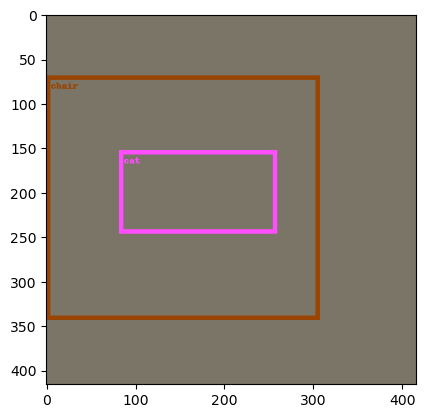

In [23]:
img_h = 416
img_w = 416
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)
fill = (123.0, 117.0, 104.0)

import PIL.Image
transforms = v2.Compose([
    v2.ToImage(),
    v2.Lambda(lambda inp: tv_tensors.wrap(torch.tensor(fill, dtype=inp.dtype, device=inp.device).view(3, 1, 1).expand(inp.shape), like=inp)
              if isinstance(inp, tv_tensors.Image) else inp),
    Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=imgs_mean, std=imgs_std),
    Voc2Yolov2(),
])

dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y, y_supp = dataset_2007_train_v2[10]
print(f"{x.shape=}\n{y.shape=}")
y = Voc2Yolov2().inv_targets_transform(x, y)
print(f"{y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()